In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('bank.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.drop(df.index[df['education'] == 'unknown'], inplace = True)
df.drop(df.index[df['job'] == 'unknown'], inplace = True)
df.drop(df.index[df['contact'] == 'unknown'], inplace = True)
df.drop(df.index[df['poutcome'] == 'unknown'], inplace = True)

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 1 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        764 non-null    int64 
 1   job        764 non-null    object
 2   marital    764 non-null    object
 3   education  764 non-null    object
 4   default    764 non-null    object
 5   balance    764 non-null    int64 
 6   housing    764 non-null    object
 7   loan       764 non-null    object
 8   contact    764 non-null    object
 9   day        764 non-null    int64 
 10  month      764 non-null    object
 11  duration   764 non-null    int64 
 12  campaign   764 non-null    int64 
 13  pdays      764 non-null    int64 
 14  previous   764 non-null    int64 
 15  poutcome   764 non-null    object
 16  y          764 non-null    object
dtypes: int64(7), object(10)
memory usage: 107.4+ KB


In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:ylabel='previous'>

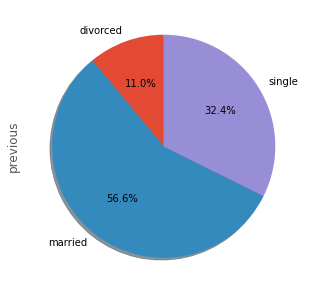

In [8]:
#Marketing campaign yang berhasil lebih banyak untuk customer profile yang sudah menikah

df[df["y"] == "yes"].groupby(["marital"])["previous"].sum().plot(kind="pie",  figsize=(5, 30),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,      
                            )

(<AxesSubplot:xlabel='job'>,)

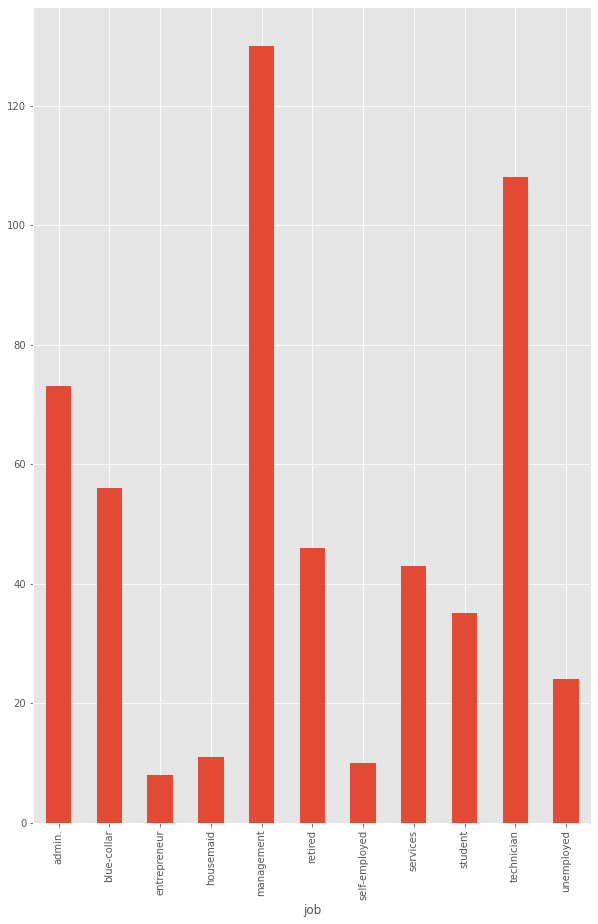

In [9]:
df[df["y"] == "yes"].groupby(["job"])["previous"].sum().plot(kind="bar",  figsize=(10, 15)),

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#Rubah dari string ke integer
education_encoded = le.fit_transform(df.education.values)
y_encoded = le.fit_transform(df.y.values)

In [11]:
x = education_encoded
y = y_encoded

In [12]:
x = x.reshape(-1,1)
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [13]:
print(model.intercept_, model.coef_)

#y=ax+b
#y=-2.24467586+0.16667854 (#ini persamaan garisnya)

[-1.59867746] [[0.29437168]]


In [14]:
#LOGISTIC REGRESSION (prediksinya sekitar 88%)

model.score(x, y)

0.7761780104712042

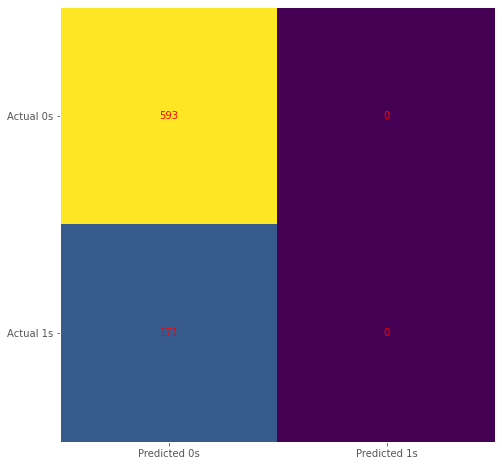

In [15]:
#Ini saya kurang yakin pak untuk modelnya sepertinya ada yang kurang sesuai jadi visualisasinya seperti ini

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# First Feature
marital_encoded = le.fit_transform(df.marital.values)

# Second Feature
job_encoded = le.fit_transform(df.job.values)

#Target
label=le.fit_transform(y)

In [17]:
#combining marital and job into single list of tuples
features=list(zip(marital_encoded,job_encoded))
print(features)

[(1, 7), (2, 4), (2, 4), (1, 6), (1, 7), (1, 1), (2, 0), (1, 7), (1, 4), (1, 1), (1, 9), (0, 1), (1, 4), (0, 1), (1, 10), (1, 7), (2, 0), (0, 1), (2, 4), (2, 4), (2, 8), (2, 1), (2, 4), (2, 1), (2, 0), (1, 0), (1, 0), (1, 9), (2, 4), (2, 0), (1, 0), (1, 0), (1, 0), (2, 7), (1, 9), (1, 5), (2, 9), (2, 9), (0, 4), (1, 9), (2, 7), (1, 9), (1, 1), (1, 9), (1, 9), (2, 9), (2, 1), (1, 1), (1, 4), (1, 9), (1, 5), (1, 9), (1, 7), (1, 3), (1, 0), (0, 5), (1, 1), (2, 0), (1, 2), (1, 4), (1, 9), (1, 10), (2, 9), (2, 4), (1, 5), (1, 4), (2, 1), (1, 4), (1, 6), (1, 4), (1, 4), (2, 4), (1, 2), (1, 0), (2, 7), (1, 4), (1, 1), (1, 7), (2, 4), (1, 1), (2, 9), (1, 4), (1, 0), (0, 5), (1, 4), (2, 4), (1, 1), (2, 0), (0, 4), (1, 1), (1, 3), (1, 5), (1, 9), (1, 0), (1, 3), (2, 4), (1, 1), (1, 9), (0, 10), (1, 4), (1, 5), (0, 0), (1, 7), (2, 0), (1, 9), (1, 5), (1, 0), (1, 9), (1, 9), (1, 4), (1, 1), (2, 9), (1, 3), (1, 1), (1, 9), (1, 9), (2, 4), (1, 4), (1, 9), (0, 4), (1, 4), (2, 3), (2, 2), (1, 5), (1, 

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted = model.predict([[0,2]]) 

print(predicted)

[0]


In [19]:
#K-Nearest Neighboor

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7304347826086957


In [20]:
#NAIVE BAYES 

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7782608695652173


In [21]:
#DECISION TREES

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7391304347826086


In [22]:
#RANDOM FOREST

# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7869565217391304


In [23]:
#SVM

from sklearn import svm 

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train) 

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8043478260869565
